# Part 1: Gathering Data


In [2]:
from pathlib import Path
import time

import os
import requests
import pandas as pd

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.

    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded

    return: The pathlib.Path object representing the file.
    """

    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path(file)
    # If the file already exists and we want to force a download then
    # delete the file first so that the creation date is correct.
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    return file_path

def fetch_and_cache_gdrive(gdrive_id, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.

    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded

    return: The pathlib.Path object representing the file.
    """

    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path(file)
    # If the file already exists and we want to force a download then
    # delete the file first so that the creation date is correct.
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        download_file_from_google_drive(gdrive_id, file_path)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    return file_path



# https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)

    needs_confirm = needs_confirmation(response)

    if needs_confirm:
        params = { 'id' : id, 'confirm' : 't' ,}
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)

def needs_confirmation(response):

    return response.headers["Content-Type"] == 'text/html; charset=utf-8'

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)


In [113]:
# download required datasets

file_dict = {
    "aqs_sites.csv": "1fMfkw-NJ03VrQxYpDjM_4T6VDaWhvegi",
    "greenhouse_gas_emmitter_facilities.csv": "1yjTRv1OrsdWk-xNW4ZbFYB7_8Tt_x_fV",
    "greenhouse_gas_emmiter_gas_types.csv":"1akEokx_wqsgYqGNnNJsgebA6DDGHJLR2",
    "2020_daily_global_weather.csv":"15pjzsCiIE0uL69a4tZYgXoog8TKjIJNJ",
    "daily_wind_2020.csv": "18MqsjkN0EYPuLb0iR0U9sZYmNVCdd94h",
    "daily_temperature_2020.csv": "1Q62JlGtc65L2eU9FfQZcP9UyMCdcem1T",
    "traffic_volumes.csv": "1sZyjZSWz1xEoB26u_OrhKokZYhTIJRMD",
    "county_aqi_2020_daily.csv": "1uNH90XRceOfb16ctuUsYXVIEDeR2yaeC"
    }

for k, v in file_dict.items():
    path = f"./datasets/{k}"
    if not os.path.exists(path):
        download_file_from_google_drive(v,path)



## Creating Dataframes

In [4]:
aqs_site_df = pd.read_csv(f"./datasets/aqs_sites.csv")
gh_gas_facil_df = pd.read_csv(f"./datasets/greenhouse_gas_emmitter_facilities.csv")
gh_gas_type_df = pd.read_csv(f"./datasets/greenhouse_gas_emmiter_gas_types.csv")
weather_2020_df = pd.read_csv(f"./datasets/2020_daily_global_weather.csv")
wind_2020_df = pd.read_csv(f"./datasets/daily_wind_2020.csv")
temp_2020_df = pd.read_csv(f"./datasets/daily_temperature_2020.csv")
traffic_volumes_df = pd.read_csv(f"./datasets/traffic_volumes.csv", low_memory=False)
aqi_2020 = pd.read_csv(f"./datasets/county_aqi_2020_daily.csv")

### aqs site data

In [5]:
print(aqs_site_df.columns)
display(aqs_site_df.sample(10))

Index(['State Code', 'County Code', 'Site Number', 'Latitude', 'Longitude',
       'Datum', 'Elevation', 'Land Use', 'Location Setting',
       'Site Established Date', 'Site Closed Date', 'Met Site State Code',
       'Met Site County Code', 'Met Site Site Number', 'Met Site Type',
       'Met Site Distance', 'Met Site Direction', 'GMT Offset',
       'Owning Agency', 'Local Site Name', 'Address', 'Zip Code', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Tribe Name',
       'Extraction Date'],
      dtype='object')


,State Code,County Code,Site Number,Latitude,Longitude,Datum,Elevation,Land Use,Location Setting,Site Established Date,...,Owning Agency,Local Site Name,Address,Zip Code,State Name,County Name,City Name,CBSA Name,Tribe Name,Extraction Date
19807,55,79,97,43.015562,-87.910026,WGS84,0.0,INDUSTRIAL,URBAN AND CENTER CITY,1975-01-01,...,"Wisconsin Dept Of Natural Resources, Air Monit...",NaN,1550 S BARCLAY ST,53204.0,Wisconsin,Milwaukee,Milwaukee,"Milwaukee-Waukesha-West Allis, WI",NaN,2021-05-18
9749,29,19,10,38.966930,-92.335770,WGS84,255.0,INDUSTRIAL,URBAN AND CENTER CITY,1985-01-01,...,Shell,NaN,1409C ILLINOIS AVE,65203.0,Missouri,Boone,Columbia,"Columbia, MO",NaN,2021-05-18
5467,18,167,1006,39.541981,-87.397242,WGS84,160.0,AGRICULTURAL,RURAL,1980-01-01,...,Public Service Of Indiana,NaN,"WEST OF ANACONDA PLANT, U.S. 41",NaN,Indiana,Vigo,Not in a city,"Terre Haute, IN",NaN,2021-05-18
17488,48,201,12,29.856111,-95.381667,WGS84,18.0,COMMERCIAL,SUBURBAN,1967-01-01,...,City of Houston Health Department,NaN,10413 FULTON AT SUNNYSIDE,NaN,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",NaN,2021-05-18
17965,49,17,4,37.775556,-111.614722,WGS84,1789.0,DESERT,RURAL,2011-12-15,...,National Park Service,NaN,Escalante National Monument - Visitor Center,84726.0,Utah,Garfield,Escalante,NaN,NaN,2021-05-18
4042,15,1,4,19.519199,-155.918324,WGS84,488.0,AGRICULTURAL,RURAL,1972-01-01,...,Hawaii State Department Of Health,NaN,"KONA HOSPITAL, KEALAKEKUA, HAWAII",NaN,Hawaii,Hawaii,Kealakekua,"Hilo, HI",NaN,2021-05-18
10197,29,510,86,38.673221,-90.239166,WGS84,0.0,RESIDENTIAL,URBAN AND CENTER CITY,1999-01-01,...,St Louis City Division Of Air Pollution Control,MARGARETTA CATEGORY B CORE SLAM PM2.5.,"MARGARETTA: 4520 Margaretta, St. Louis, MO 63115",63115.0,Missouri,St. Louis City,St. Louis,"St. Louis, MO-IL",NaN,2021-05-18
3010,12,31,20,30.317452,-81.764288,WGS84,12.0,RESIDENTIAL,SUBURBAN,1973-01-01,...,Florida Department of Environmental Protection...,NaN,6959 STUART AVE,32254.0,Florida,Duval,Jacksonville,"Jacksonville, FL",NaN,2021-05-18
7837,24,33,25,38.941210,-76.932190,WGS84,49.0,RESIDENTIAL,SUBURBAN,2006-12-15,...,Maryland Department of the Environment,Bladensburg VFC,"Bladensburg Volunteer Fire Department, 4213 Ed...",20710.0,Maryland,Prince George's,Bladensburg,"Washington-Arlington-Alexandria, DC-VA-MD-WV",NaN,2021-05-18
6486,21,13,1,36.608138,-83.714638,WGS84,364.0,COMMERCIAL,URBAN AND CENTER CITY,1968-01-01,...,Kentucky Division For Air Quality,NaN,MIDDLESBORO POST OFFICE BUILDING,NaN,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",NaN,2021-05-18


### gh gas facility data

In [6]:
print(gh_gas_facil_df.columns)
display(gh_gas_facil_df.sample(10))

Index(['V_GHG_EMITTER_FACILITIES.ADDRESS1',
       'V_GHG_EMITTER_FACILITIES.ADDRESS2',
       'V_GHG_EMITTER_FACILITIES.CEMS_USED', 'V_GHG_EMITTER_FACILITIES.CITY',
       'V_GHG_EMITTER_FACILITIES.COUNTY',
       'V_GHG_EMITTER_FACILITIES.COUNTY_FIPS',
       'V_GHG_EMITTER_FACILITIES.FACILITY_ID',
       'V_GHG_EMITTER_FACILITIES.LATITUDE',
       'V_GHG_EMITTER_FACILITIES.LONGITUDE',
       'V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE',
       'V_GHG_EMITTER_FACILITIES.STATE', 'V_GHG_EMITTER_FACILITIES.STATE_NAME',
       'V_GHG_EMITTER_FACILITIES.YEAR', 'V_GHG_EMITTER_FACILITIES.ZIP',
       'V_GHG_EMITTER_FACILITIES.FACILITY_NAME',
       'V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE',
       'V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES',
       'V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND',
       'V_GHG_EMITTER_FACILITIES.EPA_VERIFIED',
       'V_GHG_EMITTER_FACILITIES.PARENT_COMPANY',
       'V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR'],
      dtype='object')


,V_GHG_EMITTER_FACILITIES.ADDRESS1,V_GHG_EMITTER_FACILITIES.ADDRESS2,V_GHG_EMITTER_FACILITIES.CEMS_USED,V_GHG_EMITTER_FACILITIES.CITY,V_GHG_EMITTER_FACILITIES.COUNTY,V_GHG_EMITTER_FACILITIES.COUNTY_FIPS,V_GHG_EMITTER_FACILITIES.FACILITY_ID,V_GHG_EMITTER_FACILITIES.LATITUDE,V_GHG_EMITTER_FACILITIES.LONGITUDE,V_GHG_EMITTER_FACILITIES.PRIMARY_NAICS_CODE,...,V_GHG_EMITTER_FACILITIES.STATE_NAME,V_GHG_EMITTER_FACILITIES.YEAR,V_GHG_EMITTER_FACILITIES.ZIP,V_GHG_EMITTER_FACILITIES.FACILITY_NAME,V_GHG_EMITTER_FACILITIES.SECONDARY_NAICS_CODE,V_GHG_EMITTER_FACILITIES.ADDITIONAL_NAICS_CODES,V_GHG_EMITTER_FACILITIES.COGENERATION_UNIT_EMISS_IND,V_GHG_EMITTER_FACILITIES.EPA_VERIFIED,V_GHG_EMITTER_FACILITIES.PARENT_COMPANY,V_GHG_EMITTER_FACILITIES.PLANT_CODE_INDICATOR
8020,8490 WEST BAY ROAD,NaN,NaN,BAYTOWN,CHAMBERS COUNTY,48071.0,1002830.0,29.762778,-94.909722,325311.0,...,TEXAS,2014.0,77520.0,EL DORADO NITROGEN LLC,NaN,NaN,N,NaN,LSB INDUSTRIES INC (100%),N
1381,NaN,NaN,NaN,MOUNT PLEASANT,Titus,48449.0,1001034.0,33.091700,-95.041700,221112.0,...,TEXAS,2018.0,75455.0,Monticello,NaN,NaN,N,NaN,VISTRA ENERGY CORP (100%),Y
18470,1 MARKET ST,NaN,NaN,ELMWOOD PARK,BERGEN COUNTY,34003.0,1004098.0,40.902330,-74.131790,322291.0,...,NEW JERSEY,2015.0,7407.0,MARCAL MANUFACTURING LLC.,NaN,NaN,N,NaN,MARCAL MANUFACTURING LLC (100%),N
50438,1 Riverwood Drive,NaN,NaN,Moncks Corner,BERKELEY COUNTY,45015.0,1009719.0,33.198690,-79.980410,221112.0,...,SOUTH CAROLINA,2014.0,29461.0,Santee Cooper T and D,NaN,NaN,N,NaN,SANTEE COOPER (100%),N
67792,2111 NW Riverside Dr.,NaN,NaN,Evansville,VANDERBURGH COUNTY,18163.0,1004210.0,38.005965,-87.549475,221210.0,...,INDIANA,2017.0,47708.0,Indiana Gas Company,NaN,NaN,N,NaN,VECTREN CORP (100%),N
62529,1140 WEST 200 SOUTH,NaN,NaN,SALT LAKE CITY,SALT LAKE COUNTY,49035.0,1006379.0,40.764970,-111.924390,221210.0,...,UTAH,2012.0,84101.0,Dominion Energy Questar Gas Company (Dist) (Wy...,NaN,NaN,N,NaN,QUESTAR CORP (100%),NaN
63048,NaN,NaN,NaN,Offshore,LAFAYETTE,22055.0,1003174.0,28.945539,-90.031099,211111.0,...,LOUISIANA,2010.0,0.0,GI 47 A (Complex ID # 20046),NaN,NaN,N,NaN,APACHE CORPORATION (75%),NaN
13483,3450 E 2056TH RD,NaN,NaN,WEDRON,LA SALLE,17099.0,1003526.0,41.433340,-88.773870,212322.0,...,ILLINOIS,2011.0,60557.0,WEDRON COMPLEX (WEDRON SILICA CO & TECHNISAND ...,NaN,NaN,N,NaN,FAIRMOUNT MINERALS LTD. (100%),NaN
27203,14206 US Highway 87 N,NaN,NaN,Sterling,HARRIS COUNTY,48201.0,1003346.0,29.758150,-95.367830,211112.0,...,TEXAS,2016.0,76951.0,Targa Midstream Services LLC - Sterling Gas Pr...,NaN,NaN,N,NaN,TARGA RESOURCES (100%),N
64902,10 SHERWOOD LANE,NaN,NaN,CHARLTON,Worcester,25027.0,1001307.0,42.112700,-72.015200,221112.0,...,MASSACHUSETTS,2010.0,1507.0,Millennium Power Partners,NaN,NaN,N,NaN,MACHGEN LLC (100%),NaN


### gh gas type data

In [7]:
print(gh_gas_type_df.columns)
display(gh_gas_type_df.sample(10))

Index(['V_GHG_EMITTER_GAS.ADDRESS1', 'V_GHG_EMITTER_GAS.ADDRESS2',
       'V_GHG_EMITTER_GAS.CITY', 'V_GHG_EMITTER_GAS.CO2E_EMISSION',
       'V_GHG_EMITTER_GAS.COUNTY', 'V_GHG_EMITTER_GAS.FACILITY_ID',
       'V_GHG_EMITTER_GAS.GAS_CODE', 'V_GHG_EMITTER_GAS.GAS_NAME',
       'V_GHG_EMITTER_GAS.LATITUDE', 'V_GHG_EMITTER_GAS.LONGITUDE',
       'V_GHG_EMITTER_GAS.STATE', 'V_GHG_EMITTER_GAS.STATE_NAME',
       'V_GHG_EMITTER_GAS.YEAR', 'V_GHG_EMITTER_GAS.ZIP',
       'V_GHG_EMITTER_GAS.FACILITY_NAME', 'V_GHG_EMITTER_GAS.COUNTY_FIPS'],
      dtype='object')


,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
42986,6259 S RTE 45/52,NaN,CHEBANSE,7576.200499,IROQUOIS,1006418,BIOCO2,Biogenic CO2,41.029733,-87.865930,IL,ILLINOIS,2012,60922,KANKAKEE RDF,17075.0
182259,5025 83RD STREET,NaN,SACRAMENTO,44825.600000,SACRAMENTO COUNTY,1002123,CO2,Carbon Dioxide,38.529722,-121.398889,CA,CALIFORNIA,2014,95826,AIR PRODUCTS AND CHEMICALS INCORPORATED,6067.0
204937,1250 CHICAGO ST.,NaN,MILTON,83031.100000,ROCK COUNTY,1006138,CO2,Carbon Dioxide,42.759910,-88.917110,WI,WISCONSIN,2015,53563,UNITED ETHANOL LLC,55105.0
95600,1996 POTASH MINE RD,NaN,CARLSBAD,44.700000,EDDY COUNTY,1006411,N2O,Nitrous Oxide,32.497165,-103.953670,NM,NEW MEXICO,2010,88220,INTREPID POTASH WEST FLOTATION PLANT,35015.0
49170,2920 E. US 52,NaN,MORRISTOWN,1.490000,SHELBY COUNTY,1002996,N2O,Nitrous Oxide,39.693750,-85.721222,IN,INDIANA,2014,46161,CGS Services Inc.,18145.0
65654,47333 104th St,NaN,Rosholt,7.748000,ROBERTS COUNTY,1002909,N2O,Nitrous Oxide,45.872608,-96.725109,SD,SOUTH DAKOTA,2014,57260,Red River Energy,46109.0
173873,1760 WEST SKYLINE ROAD,NaN,MCKITTRICK,653.812000,Kern,1001339,N2O,Nitrous Oxide,35.295600,-119.591900,CA,CALIFORNIA,2017,93251,La Paloma Generating Plant,6029.0
217289,2191 W CR 0 NS,NaN,FRANKFORT,47.084000,CLINTON,1003215,N2O,Nitrous Oxide,40.285300,-86.547900,IN,INDIANA,2011,46041,ARCHER DANIELS MIDLAND,18023.0
210785,31.7371 101.7987,NaN,MIDKIFF,52.746000,UPTON COUNTY,1010780,N2O,Nitrous Oxide,31.502598,-101.911987,TX,TEXAS,2017,79755,TARGA DRIVER JOHNSON GAS PROCESSING PLANT,48461.0
191907,5100 Heber Springs Road West,NaN,Quitman,25.000000,CLEBURNE COUNTY,1009509,CH4,Methane,35.394960,-92.189950,AR,ARKANSAS,2014,72131,New Quitman CPF-3,5023.0


### weather 2020 data 

In [8]:
print(weather_2020_df.columns)
display(weather_2020_df.sample(10))

Index(['Unnamed: 0', 'Station', 'Date', 'TAVG', 'Latitude', 'Longitude',
       'Elevation', 'PRCP'],
      dtype='object')


,Unnamed: 0,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP
1053525,1053525,CA004027775,2020-10-19,-65.0,50.6000,-107.8000,727.0,0.0
263341,263341,RSM00027612,2020-03-12,63.0,55.8331,37.6167,156.0,18.0
648075,648075,RSM00030028,2020-06-27,199.0,59.2800,106.1700,350.0,0.0
300099,300099,USW00024128,2020-03-22,34.0,40.9017,-117.8081,1309.4,0.0
421926,421926,USS0009C01S,2020-04-25,48.0,46.7900,-109.5100,1844.0,0.0
303537,303537,USS0045R01S,2020-03-23,-67.0,66.5700,-145.2500,131.1,25.0
455192,455192,USS0022D02S,2020-05-04,57.0,45.5500,-122.0000,932.7,0.0
973867,973867,MXM00076423,2020-09-26,206.0,24.0500,-104.6000,1872.0,0.0
491382,491382,VMM00048808,2020-05-14,281.0,22.6670,106.2500,243.0,0.0
23722,23722,PK000041640,2020-01-07,105.0,31.5500,74.3330,215.0,89.0


### wind 2020 data

In [9]:
print(wind_2020_df.columns)
display(wind_2020_df.sample(10))

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
113920,6,79,9001,61104,1,35.008760,-120.599980,WGS84,Wind Direction - Resultant,1 HOUR,...,NaN,61,Instrumental - Met One Sonic Anemometer Model ...,Oso Flaco Site,Oso Flaco Lake Road,California,San Luis Obispo,Nipomo,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2021-03-25
431657,48,375,1077,61104,1,35.316500,-101.741800,NAD83,Wind Direction - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Amarillo Xcel El Rancho,Folsom Rd. & El Rancho Rd.,Texas,Potter,Amarillo,"Amarillo, TX",2021-03-19
76652,6,43,6,61104,2,37.543770,-119.839570,NAD83,Wind Direction - Resultant,1 HOUR,...,NaN,66,Instrumental - RM Young Ultrasonic Anemometer ...,Jerseydale,"6440 JERSEYDALE ROAD, JERSEYDALE",California,Mariposa,Not in a city,NaN,2021-03-08
398817,48,201,66,61104,1,29.723333,-95.635833,WGS84,Wind Direction - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Houston Westhollow,3333 1/2 Hwy 6 South,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2021-03-17
281708,29,99,9008,61103,2,38.119990,-90.282140,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,"Rush Island, Johnson Tall Tower","JOHNSON TALL TOWER: 600 Johnson Rd. Festus, MO...",Missouri,Jefferson,Not in a city,"St. Louis, MO-IL",2021-03-16
82236,6,61,6,61103,1,38.746430,-121.264980,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,66,Instrumental - RM Young Ultrasonic Anemometer ...,Roseville-N Sunrise Ave,"151 NO SUNRISE BLVD, ROSEVILLE, CA",California,Placer,Roseville,"Sacramento--Roseville--Arden-Arcade, CA",2021-03-23
402291,48,201,1035,61103,1,29.733726,-95.257593,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,20,INSTRUMENTAL - VECTOR SUMMATION,Clinton,9525 1/2 Clinton Dr,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2021-03-17
18944,4,13,4020,61104,1,33.461730,-112.127960,NAD83,Wind Direction - Resultant,1 HOUR,...,NaN,65,Instrumental - RM Young Model 05305,Thirty-Third,3248 W. Moreland,Arizona,Maricopa,Phoenix,"Phoenix-Mesa-Scottsdale, AZ",2021-03-08
231487,24,3,2002,61103,1,39.158911,-76.511025,NAD83,Wind Speed - Resultant,1 HOUR,...,NaN,24,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,NaN,8515 JENKINS RD RIVIERA BEACH MD,Maryland,Anne Arundel,Riviera Beach,"Baltimore-Columbia-Towson, MD",2021-03-19
351796,42,3,8,61103,1,40.465420,-79.960757,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,61,Instrumental - Met One Sonic Anemometer Model ...,Lawrenceville,"301 39th St, Pittsburgh, PA 15201 (Lawrenceville)",Pennsylvania,Allegheny,Pittsburgh,"Pittsburgh, PA",2021-01-22


### temp 2020 data

In [10]:
print(temp_2020_df.columns)
display(temp_2020_df.sample(10))

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')


,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
134281,29,47,5,62101,1,39.303174,-94.377014,NAD83,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Liberty,"LIBERTY: Highway & County Home Road, Liberty, ...",Missouri,Clay,Not in a city,"Kansas City, MO-KS",2021-03-16
176582,40,97,9014,62101,1,36.228408,-95.249943,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,CHEROKEE HEIGHTS,CHEROKEE HEIGHTS DRIVE,Oklahoma,Mayes,Not in a city,NaN,2021-02-24
43026,6,71,5,62101,1,34.243100,-117.272350,WGS84,Outdoor Temperature,1 HOUR,...,NaN,61,Instrumental - Met One 083D,Crestline,"LAKE GREGORY-LAKE DR, CRESTLINE",California,San Bernardino,Crestline,"Riverside-San Bernardino-Ontario, CA",2020-12-30
56142,6,83,2011,62101,1,34.445510,-119.828400,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Goleta,"380 N FAIRVIEW AVENUE, GOLETA",California,Santa Barbara,Goleta,"Santa Maria-Santa Barbara, CA",2021-04-19
99072,19,147,1002,62101,1,43.123704,-94.693518,NAD83,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,"EMMETSBURG, IOWA LAKES COMMUNITY COLL.",IOWA LAKES COMMUNITY COLLEGE,Iowa,Palo Alto,Emmetsburg,NaN,2021-01-12
271741,56,19,4,62101,2,43.874830,-106.509740,NAD83,Outdoor Temperature,1 HOUR,...,NaN,42,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 2,Johnson County,Johnson County - Intersection of Reno Road & C...,Wyoming,Johnson,Kaycee,NaN,2021-03-01
249015,53,53,1016,62101,1,47.304444,-122.412000,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,TACOMA - TOWER DR,5225 TOWER DRIVE NE,Washington,Pierce,Tacoma,"Seattle-Tacoma-Bellevue, WA",2021-03-17
148099,32,3,298,62101,2,36.048705,-115.052942,NAD83,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Green Valley,298 ARROYO GRANDE,Nevada,Clark,Henderson,"Las Vegas-Henderson-Paradise, NV",2021-02-04
272876,56,23,814,62101,1,41.773300,-110.629700,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,SITE SBIII LOCATED 2 MILES NORTHWEST OF NAUGHT...,Chevron Kemmerer Mine SB-111 (Fomerly PITTSBUR...,Wyoming,Lincoln,Not in a city,NaN,2021-03-03
67282,8,35,4,62101,1,39.534488,-105.070358,WGS84,Outdoor Temperature,1 HOUR,...,NaN,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Chatfield State Park,11500 N. Roxborough Park Rd.,Colorado,Douglas,Roxborough Park,"Denver-Aurora-Lakewood, CO",2021-02-24


### traffic volumes data

In [11]:
print(traffic_volumes_df.columns)
display(traffic_volumes_df.sample(10))

Index(['OBJECTID_1', 'OBJECTID', 'District', 'Route', 'Rte_SFX', 'County',
       'PM_PFX', 'Postmile', 'PM_SFX', 'Descriptn', 'Back_pk_h', 'Back_pk_m',
       'Back_AADT', 'Ahead_pk_h', 'Ahead_pk_m', 'Ahead_AADT', 'Lon_S_or_W',
       'Lat_S_or_W', 'Lon_N_or_E', 'Lat_N_or_E'],
      dtype='object')


,OBJECTID_1,OBJECTID,District,Route,Rte_SFX,County,PM_PFX,Postmile,PM_SFX,Descriptn,Back_pk_h,Back_pk_m,Back_AADT,Ahead_pk_h,Ahead_pk_m,Ahead_AADT,Lon_S_or_W,Lat_S_or_W,Lon_N_or_E,Lat_N_or_E
4327,4328,4328,7,60,,LA,,14.262,,"HACIENDA HEIGHTS, SEVENTH AVENUE",17800,267000,261000,16400,251000,245000,-117.9883115,34.01984325,-117.9884222,34.01963314
1467,1468,1468,3,162,,GLE,,73.549,,COUNTY ROAD V,290,3400,2650,270,3300,2500,-122.0652149,39.52156367,-122.0652149,39.52156367
5291,5292,5292,8,95,,SBD,R,57.244,,WEST JCT. RTE. 40,440,4600,4200,370,3500,2700,-114.755385,34.87807,-114.755385,34.87807
5,6,6,1,1,,MEN,,15.740,,"POINT ARENA, LAKE STREET",250,2800,2600,240,2800,2200,-123.7010328,38.91436972,-123.7010328,38.91436972
4861,4862,4862,7,710,,LA,T,32.130,,"PASADENA, ON PASADENA AVE/END OF COUPLET",3350,30500,26500,7800,75000,66000,-118.1552205,34.14111629,-118.1547179,34.14111253
1542,1543,1543,3,267,,PLA,,9.280,,"KINGS BEACH, NORTH AVENUE",1250,14600,10500,1250,14600,10500,-120.0312981,39.24707046,-120.0312981,39.24707046
727,728,728,2,299,,SHA,,74.980,,"BURNEY, PLUMAS STREET",380,9300,3300,890,9100,8400,-121.6667156,40.88200683,-121.6667745,40.88191718
433,434,434,2,5,,SIS,R,8.475,,JCT. RTE. 89,3050,29500,22400,2800,27500,21100,-122.3022837,41.28499083,-122.3018948,41.28504496
6112,6113,6113,10,140,,MER,,31.510,,BUHACH ROAD,440,5400,5300,510,6900,6800,-120.5777187,37.30229756,-120.5777187,37.30229756
2762,2763,2763,5,1,,SLO,,27.883,,BAYWOOD PARK ROAD,1300,14500,13200,4600,32500,28200,-120.8231746,35.36413282,-120.8233671,35.36429413


### aqi data 2020

In [12]:
print(aqi_2020.columns)
display(aqi_2020.sample(10))

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')


,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
18910,California,Kern,6,29,2020-09-09,103,Unhealthy for Sensitive Groups,PM10,06-029-0232,11
102420,Kansas,Ford,20,57,2020-06-11,26,Good,PM10,20-057-0002,1
289593,Texas,Tarrant,48,439,2020-06-23,33,Good,Ozone,48-439-0075,7
146160,Minnesota,Crow Wing,27,35,2020-08-14,40,Good,Ozone,27-035-3204,1
313606,Washington,Okanogan,53,47,2020-04-27,15,Good,PM2.5,53-047-0013,4
9625,Arizona,Pima,4,19,2020-06-27,61,Moderate,PM10,04-019-0020,15
211899,Ohio,Ashtabula,39,7,2020-08-11,46,Good,Ozone,39-007-1001,1
214224,Ohio,Cuyahoga,39,35,2020-02-17,66,Moderate,PM2.5,39-035-0060,6
160251,Missouri,Saint Charles,29,183,2020-09-08,35,Good,Ozone,29-183-1002,4
232821,Oregon,Crook,41,13,2020-10-15,17,Good,PM2.5,41-013-0100,1


In [13]:
## dict to use to convert fro county abbreviation to county

county_abbreviations = {
"ALA" : "Alameda",
"ALP" : "Alpine",
"AMA" : "Amador",
"BUT" : "Butte",
"CC" : "Contra Costa",
"CLV" : "Calaveras",
"COL" : "Colusa",
"DN" : "Del Norte",
"ED" : "El Dorado",
"FRE" : "Fresno",
"GLE" : "Glenn",
"HUM" : "Humboldt",
"IMP" : "Imperial",
"INY" : "Inyo",
"KER" : "Kern",
"KIN" : "Kings",
"LA" : "Los Angeles",
"LAK" : "Lake",
"LAS" : "Lassen",
"MAD" : "Madera",
"MEN" : "Mendocino",
"MER" : "Merced",
"MNO" : "Mono",
"MOD" : "Modoc",
"MRN" : "Marin",
"MPA" : "Mariposa",
"MON" : "Monterey",
"NAP" : "Napa",
"NEV" : "Nevada	",
"ORA" : "Orange",
"PLA" : "Placer",
"PLU" : "Plumas",
"RIV" : "Riverside",
"SAC" : "Sacramento",
"SB" : "Santa Barbara",
"SBD" : "San Bernardino",
"SBT" : "San Benito",
"SCL" : "Santa Clara",
"SCR" : "Santa Cruz",
"SD" : "San Diego",
"SF" : "San Francisco",
"SHA" : "Shasta",
"SIE" : "Sierra",
"SIS" : "Siskiyou",
"SJ" : "San Joaquin",
"SLO" : "San Luis Obispo",
"SM" : "San Mateo",
"SOL" : "Solano",
"SON" : "Sonoma",
"STA" : "Stanislaus",
"SUT" : "Sutter",
"TEH" : "Tehama",
"TRI" : "Trinity",
"TUL" : "Tulare",
"TUO" : "Tuolumne",
"VEN" : "Ventura",
"YOL" : "Yolo",
"YUB" : "Yuba",
}

## Data wrangling

### decisions log
- we are going to only use data for the state of california because we are interested in using vehicle emissions data which we have for the state of california in addition to the factory emissions data 

In [14]:
daily_global_weather_2020 = pd.read_csv("datasets/2020_daily_global_weather.csv").drop(columns="Unnamed: 0")

us_greenhouse_gas_emission_direct_emitter_gas_type = pd.read_csv("datasets/greenhouse_gas_emmiter_gas_types.csv", low_memory=False)

aqi_sites = pd.read_csv("datasets/aqs_sites.csv")

daily_county_aqi = pd.read_csv("datasets/county_aqi_2020_daily.csv") 

daily_temp = pd.read_csv("datasets/daily_temperature_2020.csv")

daily_wind = pd.read_csv("datasets/daily_wind_2020.csv")

traffic_volumes = pd.read_csv("datasets/traffic_volumes.csv")

In [15]:
#PRCP is average percipitation in tenths of a mm, TAVG is tempearture average at each station for each day
daily_global_weather_2020

,Station,Date,TAVG,Latitude,Longitude,Elevation,PRCP
0,AE000041196,2020-01-01,211.0,25.3330,55.5170,34.0,0.0
1,AEM00041194,2020-01-01,217.0,25.2550,55.3640,10.4,0.0
2,AFM00040938,2020-01-01,54.0,34.2100,62.2280,977.2,23.0
3,AG000060611,2020-01-01,71.0,28.0500,9.6331,561.0,10.0
4,AGE00147708,2020-01-01,99.0,36.7200,4.0500,222.0,0.0
...,...,...,...,...,...,...,...
1064278,USW00094847,2020-10-22,96.0,42.2314,-83.3308,192.3,157.0
1064279,USW00094849,2020-10-22,67.0,45.0717,-83.5644,208.5,99.0
1064280,USW00094860,2020-10-22,77.0,42.8939,-85.5447,237.1,165.0
1064281,USW00094908,2020-10-22,73.0,42.3978,-90.7036,321.9,361.0


In [16]:
us_greenhouse_gas_emission_direct_emitter_gas_type.columns

Index(['V_GHG_EMITTER_GAS.ADDRESS1', 'V_GHG_EMITTER_GAS.ADDRESS2',
       'V_GHG_EMITTER_GAS.CITY', 'V_GHG_EMITTER_GAS.CO2E_EMISSION',
       'V_GHG_EMITTER_GAS.COUNTY', 'V_GHG_EMITTER_GAS.FACILITY_ID',
       'V_GHG_EMITTER_GAS.GAS_CODE', 'V_GHG_EMITTER_GAS.GAS_NAME',
       'V_GHG_EMITTER_GAS.LATITUDE', 'V_GHG_EMITTER_GAS.LONGITUDE',
       'V_GHG_EMITTER_GAS.STATE', 'V_GHG_EMITTER_GAS.STATE_NAME',
       'V_GHG_EMITTER_GAS.YEAR', 'V_GHG_EMITTER_GAS.ZIP',
       'V_GHG_EMITTER_GAS.FACILITY_NAME', 'V_GHG_EMITTER_GAS.COUNTY_FIPS'],
      dtype='object')

In [17]:
daily_county_aqi.columns

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')

In [18]:
aqi_sites.columns

Index(['State Code', 'County Code', 'Site Number', 'Latitude', 'Longitude',
       'Datum', 'Elevation', 'Land Use', 'Location Setting',
       'Site Established Date', 'Site Closed Date', 'Met Site State Code',
       'Met Site County Code', 'Met Site Site Number', 'Met Site Type',
       'Met Site Distance', 'Met Site Direction', 'GMT Offset',
       'Owning Agency', 'Local Site Name', 'Address', 'Zip Code', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Tribe Name',
       'Extraction Date'],
      dtype='object')

#### The defining site column in daily_county_aqi is defined by "State Code"-"County Code"-"Site Number" for a given State and County in aqi_sites. Thus, the City name can be determined by the defining site using the aqi_sites table, if increased granularity is required.

In [19]:
daily_wind.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

## Aggregating Daily temp, wind speed and wind direction by state and county

## Data Cleaning/Prep on Daily Temperature Data

In [20]:
# Data Prep on daily temperature, wind speed and wind direction

# Extracting relevant columns
truncated_daily_temp = daily_temp[["State Code", "County Code", "Site Num", "State Name", "County Name", "City Name", "Latitude", "Longitude", "Date Local", "Arithmetic Mean"]]

# Array of US States and territories
US_States_territories = us_greenhouse_gas_emission_direct_emitter_gas_type["V_GHG_EMITTER_GAS.STATE_NAME"].unique()

# Only US States and territories should be in our data
truncated_daily_temp = truncated_daily_temp[truncated_daily_temp["State Name"].str.upper().isin(US_States_territories)]

# Impute missing 0s, with mean of the arithmetic mean, there are no null values
truncated_daily_temp["Arithmetic Mean"] = truncated_daily_temp["Arithmetic Mean"].replace(0, truncated_daily_temp["Arithmetic Mean"].mean())

# Rename Arithmetic Mean column to include temperature and units (Temp - F)
truncated_daily_temp = truncated_daily_temp.rename(columns={"Arithmetic Mean": "Mean Temperature (F)"})

In [21]:
truncated_daily_temp

,State Code,County Code,Site Num,State Name,County Name,City Name,Latitude,Longitude,Date Local,Mean Temperature (F)
0,1,53,1000,Alabama,Escambia,Not in a city,31.09210,-87.54350,2020-01-01,53.540000
1,1,53,1000,Alabama,Escambia,Not in a city,31.09210,-87.54350,2020-01-02,67.342857
2,1,53,1000,Alabama,Escambia,Not in a city,31.09210,-87.54350,2020-01-03,26.580000
3,1,53,1000,Alabama,Escambia,Not in a city,31.09210,-87.54350,2020-01-04,44.830000
4,1,53,1000,Alabama,Escambia,Not in a city,31.09210,-87.54350,2020-01-05,51.550000
...,...,...,...,...,...,...,...,...,...,...
290326,56,45,800,Wyoming,Weston,Newcastle,43.84539,-104.20512,2020-12-27,31.000000
290327,56,45,800,Wyoming,Weston,Newcastle,43.84539,-104.20512,2020-12-28,26.000000
290328,56,45,800,Wyoming,Weston,Newcastle,43.84539,-104.20512,2020-12-29,22.958333
290329,56,45,800,Wyoming,Weston,Newcastle,43.84539,-104.20512,2020-12-30,14.583333


## Data Prep on Daily Wind Data

In [22]:
# Extract relevant Columns
truncated_daily_wind = daily_wind[["State Code", "County Code", "Site Num", "State Name", "County Name", "City Name", "Latitude", "Longitude", "Parameter Name", "Date Local", "Arithmetic Mean"]]

# Only US States and territories should be in our data
truncated_daily_wind = truncated_daily_wind[truncated_daily_wind["State Name"].str.upper().isin(US_States_territories)]

# Seperate wind direction and wind speed before imputing missing values
daily_wind_speed = truncated_daily_wind[truncated_daily_wind["Parameter Name"] == "Wind Speed - Resultant"].reset_index(drop=True)

daily_wind_direction = truncated_daily_wind[truncated_daily_wind["Parameter Name"] == "Wind Direction - Resultant"].reset_index(drop=True)

# Impute missing values or 0 values with mean of the column
daily_wind_speed["Arithmetic Mean"] = daily_wind_speed["Arithmetic Mean"].replace(0, daily_wind_speed["Arithmetic Mean"].mean())

daily_wind_direction["Arithmetic Mean"] = daily_wind_direction["Arithmetic Mean"].replace(0, daily_wind_direction["Arithmetic Mean"].mean())

# Rename Arithmetic Mean columns to include the measurement and units
daily_wind_speed = daily_wind_speed.rename(columns={"Arithmetic Mean": "Mean Wind Speed (knots)"}).drop(columns=["Parameter Name"])
daily_wind_direction = daily_wind_direction.rename(columns={"Arithmetic Mean": "Mean Wind Direction (compass degrees)"}).drop(columns=["Parameter Name"])

In [23]:
daily_wind_speed

,State Code,County Code,Site Num,State Name,County Name,City Name,Latitude,Longitude,Date Local,Mean Wind Speed (knots)
0,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-01,4.349492
1,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-02,4.349492
2,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-03,4.349492
3,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-04,4.349492
4,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-05,4.349492
...,...,...,...,...,...,...,...,...,...,...
239426,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-27,1.795833
239427,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-28,1.212500
239428,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-29,1.441667
239429,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-30,1.466667


In [24]:
daily_wind_direction

,State Code,County Code,Site Num,State Name,County Name,City Name,Latitude,Longitude,Date Local,Mean Wind Direction (compass degrees)
0,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-01,179.900000
1,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-02,108.857143
2,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-03,271.000000
3,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-04,230.100000
4,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-05,251.100000
...,...,...,...,...,...,...,...,...,...,...
242333,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-27,190.375000
242334,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-28,171.375000
242335,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-29,181.166667
242336,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-30,173.666667


## Merging the wind, and temperature data

In [25]:
wind_data_merge = pd.merge(daily_wind_direction, daily_wind_speed, how='inner', on=["State Code", "County Code", "Site Num", "State Name", "County Name", "City Name", "Latitude", "Longitude", "Date Local"])

In [26]:
weather_data = truncated_daily_temp.merge(wind_data_merge, how='inner', on=["State Code", "County Code", "Site Num", "State Name", "County Name", "City Name", "Latitude", "Longitude", "Date Local"])

## Final dataset which includes weather data

In [27]:
weather_data

,State Code,County Code,Site Num,State Name,County Name,City Name,Latitude,Longitude,Date Local,Mean Temperature (F),Mean Wind Direction (compass degrees),Mean Wind Speed (knots)
0,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-01,53.540000,179.900000,4.349492
1,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-02,67.342857,108.857143,4.349492
2,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-03,26.580000,271.000000,4.349492
3,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-04,44.830000,230.100000,4.349492
4,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-05,51.550000,251.100000,4.349492
...,...,...,...,...,...,...,...,...,...,...,...,...
228161,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-27,15.250000,190.375000,1.795833
228162,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-28,-4.833333,171.375000,1.212500
228163,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-29,-1.625000,181.166667,1.441667
228164,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-30,8.291667,173.666667,1.466667


In [28]:
len(weather_data["City Name"].unique())

368

## Incorporating land use, elevation and location setting for the AQI sites into weather data set as features

In [29]:
truncated_aqi_sites = aqi_sites[["State Code", "County Code", "Site Number", "State Name", "County Name", "City Name", "Elevation", "Land Use", "Location Setting"]].rename(columns={"Site Number": "Site Num"})

# Only showing US and territories aqi sites
truncated_aqi_sites = truncated_aqi_sites[truncated_aqi_sites["State Name"].str.upper().isin(US_States_territories)]

truncated_aqi_sites["State Code"] = truncated_aqi_sites["State Code"].astype(int)

In [30]:
truncated_aqi_sites[(truncated_aqi_sites["State Name"] == "Alabama") & (truncated_aqi_sites["County Name"] == "Escambia")]

,State Code,County Code,Site Num,State Name,County Name,City Name,Elevation,Land Use,Location Setting
80,1,53,1,Alabama,Escambia,Brewton,37.00,RESIDENTIAL,SUBURBAN
81,1,53,2,Alabama,Escambia,Brewton,50.00,COMMERCIAL,URBAN AND CENTER CITY
82,1,53,1000,Alabama,Escambia,Not in a City,89.61,AGRICULTURAL,RURAL


In [31]:
feature_set = weather_data.merge(truncated_aqi_sites, on=["State Code", "County Code", "Site Num"])

In [32]:
feature_set = feature_set.drop(columns=["State Name_y", "County Name_y", "City Name_y"]).rename(columns={"State Name_x": "State Name", "County Name_x": "County Name", "City Name_x": "City Name"})

In [33]:
feature_set

,State Code,County Code,Site Num,State Name,County Name,City Name,Latitude,Longitude,Date Local,Mean Temperature (F),Mean Wind Direction (compass degrees),Mean Wind Speed (knots),Elevation,Land Use,Location Setting
0,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-01,53.540000,179.900000,4.349492,89.61,AGRICULTURAL,RURAL
1,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-02,67.342857,108.857143,4.349492,89.61,AGRICULTURAL,RURAL
2,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-03,26.580000,271.000000,4.349492,89.61,AGRICULTURAL,RURAL
3,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-04,44.830000,230.100000,4.349492,89.61,AGRICULTURAL,RURAL
4,1,53,1000,Alabama,Escambia,Not in a city,31.092100,-87.543500,2020-01-05,51.550000,251.100000,4.349492,89.61,AGRICULTURAL,RURAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228161,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-27,15.250000,190.375000,1.795833,2230.00,FOREST,RURAL
228162,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-28,-4.833333,171.375000,1.212500,2230.00,FOREST,RURAL
228163,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-29,-1.625000,181.166667,1.441667,2230.00,FOREST,RURAL
228164,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-12-30,8.291667,173.666667,1.466667,2230.00,FOREST,RURAL


## Adding the observed values for AQI to the features dataset

In [34]:
## Extracting the Site Num from Defining Site
daily_county_aqi["Site Num"] = daily_county_aqi["Defining Site"].str.extract(pat=f'\d+-\d+-(\d+)').astype(int)

In [35]:
## Renaming columns to allow for merge
daily_county_aqi = daily_county_aqi.rename(columns={"county Name": "County Name", "Date": "Date Local"})

In [36]:
## Merging with the feature set
final_data_set = feature_set.merge(daily_county_aqi, on=["State Code", "County Code", "Site Num", "Date Local"])

In [37]:
## Dropping redundant columns and renaming 
final_data_set = final_data_set.drop(columns=["State Name_y", "County Name_y"]).rename(columns={"State Name_x": "State Name", "County Name_x":"County Name"})

In [38]:
final_data_set

,State Code,County Code,Site Num,State Name,County Name,City Name,Latitude,Longitude,Date Local,Mean Temperature (F),Mean Wind Direction (compass degrees),Mean Wind Speed (knots),Elevation,Land Use,Location Setting,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.815000,2020-01-09,52.125000,137.125000,4.904167,177.0,COMMERCIAL,URBAN AND CENTER CITY,56,Moderate,PM2.5,01-073-0023,9
1,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.815000,2020-01-10,65.750000,163.708333,7.583333,177.0,COMMERCIAL,URBAN AND CENTER CITY,44,Good,PM2.5,01-073-0023,9
2,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.815000,2020-01-14,63.937500,208.916667,3.166667,177.0,COMMERCIAL,URBAN AND CENTER CITY,30,Good,NO2,01-073-0023,9
3,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.815000,2020-01-16,58.012500,75.458333,5.945833,177.0,COMMERCIAL,URBAN AND CENTER CITY,31,Good,Ozone,01-073-0023,9
4,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.815000,2020-01-17,54.945833,105.375000,5.491667,177.0,COMMERCIAL,URBAN AND CENTER CITY,34,Good,Ozone,01-073-0023,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94814,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-10-05,45.708333,162.666667,2.287500,2230.0,FOREST,RURAL,54,Moderate,PM2.5,56-039-1013,3
94815,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-10-07,44.083333,174.791667,2.087500,2230.0,FOREST,RURAL,85,Moderate,PM2.5,56-039-1013,3
94816,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-10-08,46.375000,169.375000,3.016667,2230.0,FOREST,RURAL,69,Moderate,PM2.5,56-039-1013,3
94817,56,39,1013,Wyoming,Teton,Not in a city,44.373056,-110.830833,2020-10-09,45.041667,168.666667,2.612500,2230.0,FOREST,RURAL,55,Moderate,PM2.5,56-039-1013,4


## US Emissions data set

## Incorporating US GH emissions by state/county as features 

In [39]:
us_greenhouse_gas_emission_direct_emitter_gas_type.columns

Index(['V_GHG_EMITTER_GAS.ADDRESS1', 'V_GHG_EMITTER_GAS.ADDRESS2',
       'V_GHG_EMITTER_GAS.CITY', 'V_GHG_EMITTER_GAS.CO2E_EMISSION',
       'V_GHG_EMITTER_GAS.COUNTY', 'V_GHG_EMITTER_GAS.FACILITY_ID',
       'V_GHG_EMITTER_GAS.GAS_CODE', 'V_GHG_EMITTER_GAS.GAS_NAME',
       'V_GHG_EMITTER_GAS.LATITUDE', 'V_GHG_EMITTER_GAS.LONGITUDE',
       'V_GHG_EMITTER_GAS.STATE', 'V_GHG_EMITTER_GAS.STATE_NAME',
       'V_GHG_EMITTER_GAS.YEAR', 'V_GHG_EMITTER_GAS.ZIP',
       'V_GHG_EMITTER_GAS.FACILITY_NAME', 'V_GHG_EMITTER_GAS.COUNTY_FIPS'],
      dtype='object')

In [40]:
us_greenhouse_gas_emission_direct_emitter_gas_type

,V_GHG_EMITTER_GAS.ADDRESS1,V_GHG_EMITTER_GAS.ADDRESS2,V_GHG_EMITTER_GAS.CITY,V_GHG_EMITTER_GAS.CO2E_EMISSION,V_GHG_EMITTER_GAS.COUNTY,V_GHG_EMITTER_GAS.FACILITY_ID,V_GHG_EMITTER_GAS.GAS_CODE,V_GHG_EMITTER_GAS.GAS_NAME,V_GHG_EMITTER_GAS.LATITUDE,V_GHG_EMITTER_GAS.LONGITUDE,V_GHG_EMITTER_GAS.STATE,V_GHG_EMITTER_GAS.STATE_NAME,V_GHG_EMITTER_GAS.YEAR,V_GHG_EMITTER_GAS.ZIP,V_GHG_EMITTER_GAS.FACILITY_NAME,V_GHG_EMITTER_GAS.COUNTY_FIPS
0,1919 S. BROADWAY,NaN,GREEN BAY,58024.000,BROWN COUNTY,1000589,BIOCO2,Biogenic CO2,44.492500,-88.032300,WI,WISCONSIN,2017,54304,GEORGIA-PACIFIC CONSUMER OPERATIONS LLC,55009.0
1,850 12TH AVE,NaN,NEW YORK,134.500,New York,1000766,CH4,Methane,40.771100,-73.991100,NY,NEW YORK,2018,10019,59th Street,36061.0
2,3379 HWY 482,NaN,Noble,6.854,SABINE,1009343,N2O,Nitrous Oxide,31.621528,-93.724774,LA,LOUISIANA,2012,71462,Baker Road Treater,22085.0
3,1012 BEAUCHAMP ST,NaN,GREENVILLE,53562.000,WASHINGTON COUNTY,1003557,CH4,Methane,33.392476,-91.017584,MS,MISSISSIPPI,2017,38701,TEXAS GAS TRANSMISSION - GREENVILLE STATION,28151.0
4,487 CORN CREEK ROAD,NaN,BEDFORD,7635064.700,Trimble,1006542,CO2,Carbon Dioxide,38.584700,-85.411700,KY,KENTUCKY,2018,40006,Trimble County,21223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219923,14353 McFarland Road,NaN,Burlington,1929.800,SKAGIT COUNTY,1010898,CO2,Carbon Dioxide,48.448041,-122.433615,WA,WASHINGTON,2016,98273,Sierra Pacific Industries - Burlington,53057.0
219924,7628 Thorndike Road,NaN,Greensboro,2776.500,GUILFORD COUNTY,1010033,CO2,Carbon Dioxide,36.075650,-79.965030,NC,NORTH CAROLINA,2018,27409,QORVO,37081.0
219925,NaN,NaN,Calumet,28352.800,CANADIAN COUNTY,1011778,CO2,Carbon Dioxide,35.516370,-98.182280,OK,OKLAHOMA,2014,73014,OFS CS Cedar Lake,40017.0
219926,1186 Calkins Rd,NaN,Troy,23.840,BRADFORD,1010571,N2O,Nitrous Oxide,41.730488,-76.707873,PA,PENNSYLVANIA,2012,16947,Granville Compressor Station,42015.0


In [41]:
US_GH_gas_emissions = us_greenhouse_gas_emission_direct_emitter_gas_type[["V_GHG_EMITTER_GAS.STATE_NAME", "V_GHG_EMITTER_GAS.COUNTY", "V_GHG_EMITTER_GAS.CITY", "V_GHG_EMITTER_GAS.CO2E_EMISSION", "V_GHG_EMITTER_GAS.GAS_CODE", "V_GHG_EMITTER_GAS.GAS_NAME", "V_GHG_EMITTER_GAS.YEAR"]]

In [42]:
pd.options.mode.chained_assignment = None

# Renaming columns and making sure the names match with the final_data set we will eventually merge with.
US_GH_gas_emissions.columns = ["State Name", "County Name", "City Name", "CO2 equiv emission", "Gas Code", "Gas Name", "Year"]
US_GH_gas_emissions["State Name"] = US_GH_gas_emissions["State Name"].str.title()
US_GH_gas_emissions["County Name"] = US_GH_gas_emissions["County Name"].str.title()
US_GH_gas_emissions["City Name"] = US_GH_gas_emissions["City Name"].str.title()

In [43]:
US_GH_gas_emissions

,State Name,County Name,City Name,CO2 equiv emission,Gas Code,Gas Name,Year
0,Wisconsin,Brown County,Green Bay,58024.000,BIOCO2,Biogenic CO2,2017
1,New York,New York,New York,134.500,CH4,Methane,2018
2,Louisiana,Sabine,Noble,6.854,N2O,Nitrous Oxide,2012
3,Mississippi,Washington County,Greenville,53562.000,CH4,Methane,2017
4,Kentucky,Trimble,Bedford,7635064.700,CO2,Carbon Dioxide,2018
...,...,...,...,...,...,...,...
219923,Washington,Skagit County,Burlington,1929.800,CO2,Carbon Dioxide,2016
219924,North Carolina,Guilford County,Greensboro,2776.500,CO2,Carbon Dioxide,2018
219925,Oklahoma,Canadian County,Calumet,28352.800,CO2,Carbon Dioxide,2014
219926,Pennsylvania,Bradford,Troy,23.840,N2O,Nitrous Oxide,2012


In [44]:
Grouped_US_GH_gas_emissions = US_GH_gas_emissions.groupby(["State Name", "County Name", "City Name", "Gas Code"])["CO2 equiv emission"].agg("mean").reset_index()

In [45]:
# CO2 equiv emissions are the average annual CO2 equiv emissions for the gas.
Grouped_US_GH_gas_emissions

,State Name,County Name,City Name,Gas Code,CO2 equiv emission
0,Alabama,Autauga,Autaugaville,CH4,9.502500e+02
1,Alabama,Autauga,Autaugaville,CO2,2.049189e+06
2,Alabama,Autauga,Autaugaville,N2O,1.132698e+03
3,Alabama,Autauga,Billingsley,CH4,6.356875e+02
4,Alabama,Autauga,Billingsley,CO2,1.375766e+06
...,...,...,...,...,...
23017,Wyoming,Weston,Osage,CO2,7.340513e+04
23018,Wyoming,Weston,Osage,N2O,1.081740e+03
23019,Wyoming,Weston County,Newcastle,CH4,1.263103e+03
23020,Wyoming,Weston County,Newcastle,CO2,9.864694e+04


In [46]:
# Convert to daily GH gas emissions
Grouped_US_GH_gas_emissions["Average Daily CO2 equiv emission"] = Grouped_US_GH_gas_emissions["CO2 equiv emission"] / 366

In [47]:
Grouped_US_GH_gas_emissions = Grouped_US_GH_gas_emissions.drop(columns="CO2 equiv emission")

In [48]:
Grouped_US_GH_gas_emissions

,State Name,County Name,City Name,Gas Code,Average Daily CO2 equiv emission
0,Alabama,Autauga,Autaugaville,CH4,2.596311
1,Alabama,Autauga,Autaugaville,CO2,5598.875820
2,Alabama,Autauga,Autaugaville,N2O,3.094803
3,Alabama,Autauga,Billingsley,CH4,1.736851
4,Alabama,Autauga,Billingsley,CO2,3758.924495
...,...,...,...,...,...
23017,Wyoming,Weston,Osage,CO2,200.560474
23018,Wyoming,Weston,Osage,N2O,2.955574
23019,Wyoming,Weston County,Newcastle,CH4,3.451101
23020,Wyoming,Weston County,Newcastle,CO2,269.527162


In [49]:
Pivot_Grouped_US_GH_gas_emissions = Grouped_US_GH_gas_emissions.pivot_table('Average Daily CO2 equiv emission', ["State Name", "County Name", "City Name"], "Gas Code").reset_index()

In [50]:
Pivot_Grouped_US_GH_gas_emissions

Gas Code,State Name,County Name,City Name,BIOCO2,CH4,CO2,HFC,HFE,N2O,NF3,Other,Other_Full,PFC,SF6,Very_Short
0,Alabama,Autauga,Autaugaville,NaN,2.596311,5598.875820,NaN,NaN,3.094803,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Autauga,Billingsley,NaN,1.736851,3758.924495,NaN,NaN,2.072728,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,Autauga,Prattville,4362.405137,72.520516,860.282705,NaN,NaN,31.186514,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,Baldwin County,Summerdale,NaN,499.213388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,Barbour County,Eufaula,NaN,0.055024,105.047787,NaN,NaN,0.065589,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,Wyoming,Uinta County,Mountain View,NaN,5.354679,36.397404,NaN,NaN,0.019948,NaN,NaN,NaN,NaN,NaN,NaN
7673,Wyoming,Washakie,Worland,NaN,0.038934,66.135656,NaN,NaN,0.054552,NaN,NaN,NaN,NaN,NaN,NaN
7674,Wyoming,Washakie County,Worland,NaN,0.047558,79.295663,NaN,NaN,0.067885,NaN,NaN,NaN,NaN,NaN,NaN
7675,Wyoming,Weston,Osage,NaN,0.155055,200.560474,NaN,NaN,2.955574,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Resetting index
Pivot_Grouped_US_GH_gas_emissions = Pivot_Grouped_US_GH_gas_emissions.rename_axis(None, axis=1)

In [52]:
Pivot_Grouped_US_GH_gas_emissions

,State Name,County Name,City Name,BIOCO2,CH4,CO2,HFC,HFE,N2O,NF3,Other,Other_Full,PFC,SF6,Very_Short
0,Alabama,Autauga,Autaugaville,NaN,2.596311,5598.875820,NaN,NaN,3.094803,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Autauga,Billingsley,NaN,1.736851,3758.924495,NaN,NaN,2.072728,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,Autauga,Prattville,4362.405137,72.520516,860.282705,NaN,NaN,31.186514,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,Baldwin County,Summerdale,NaN,499.213388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,Barbour County,Eufaula,NaN,0.055024,105.047787,NaN,NaN,0.065589,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,Wyoming,Uinta County,Mountain View,NaN,5.354679,36.397404,NaN,NaN,0.019948,NaN,NaN,NaN,NaN,NaN,NaN
7673,Wyoming,Washakie,Worland,NaN,0.038934,66.135656,NaN,NaN,0.054552,NaN,NaN,NaN,NaN,NaN,NaN
7674,Wyoming,Washakie County,Worland,NaN,0.047558,79.295663,NaN,NaN,0.067885,NaN,NaN,NaN,NaN,NaN,NaN
7675,Wyoming,Weston,Osage,NaN,0.155055,200.560474,NaN,NaN,2.955574,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Get number of non null entires (to see which gasses to add to the data set)
Pivot_Grouped_US_GH_gas_emissions.count()

State Name     7677
County Name    7677
City Name      7677
BIOCO2         1360
CH4            7599
CO2            6908
HFC              91
HFE              36
N2O            6507
NF3              63
Other            17
Other_Full       69
PFC              96
SF6             226
Very_Short       50
dtype: int64

### Based on the counts of non null entries, we have a reasonable amount of data for BIOCO2, CH4, CO2, and N2O. So we will try to use these as features. We can revist this if need be.

In [223]:
# Truncating data to the gasses we want and filling the NaN with 0s
Truncated_US_GH_gas_emissions = Pivot_Grouped_US_GH_gas_emissions[["State Name", "County Name", "City Name", "BIOCO2", "CH4", "CO2", "N2O"]].fillna(0)

In [224]:
Truncated_US_GH_gas_emissions

,State Name,County Name,City Name,BIOCO2,CH4,CO2,N2O
0,Alabama,Autauga,Autaugaville,0.000000,2.596311,5598.875820,3.094803
1,Alabama,Autauga,Billingsley,0.000000,1.736851,3758.924495,2.072728
2,Alabama,Autauga,Prattville,4362.405137,72.520516,860.282705,31.186514
3,Alabama,Baldwin County,Summerdale,0.000000,499.213388,0.000000,0.000000
4,Alabama,Barbour County,Eufaula,0.000000,0.055024,105.047787,0.065589
...,...,...,...,...,...,...,...
7672,Wyoming,Uinta County,Mountain View,0.000000,5.354679,36.397404,0.019948
7673,Wyoming,Washakie,Worland,0.000000,0.038934,66.135656,0.054552
7674,Wyoming,Washakie County,Worland,0.000000,0.047558,79.295663,0.067885
7675,Wyoming,Weston,Osage,0.000000,0.155055,200.560474,2.955574


## Merging Gas data with our Final Features Dataset

In [225]:
## Merging Gas data with our Final Features Dataset
complete_data_set = final_data_set.merge(Truncated_US_GH_gas_emissions, on=["State Name", "County Name", "City Name"])

In [226]:
complete_data_set

,State Code,County Code,Site Num,State Name,County Name,City Name,Latitude,Longitude,Date Local,Mean Temperature (F),Mean Wind Direction (compass degrees),Mean Wind Speed (knots),Elevation,Land Use,Location Setting,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,BIOCO2,CH4,CO2,N2O
0,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.8150,2020-01-09,52.125000,137.125000,4.904167,177.0,COMMERCIAL,URBAN AND CENTER CITY,56,Moderate,PM2.5,01-073-0023,9,0.0,194.591845,145.217054,0.555493
1,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.8150,2020-01-10,65.750000,163.708333,7.583333,177.0,COMMERCIAL,URBAN AND CENTER CITY,44,Good,PM2.5,01-073-0023,9,0.0,194.591845,145.217054,0.555493
2,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.8150,2020-01-14,63.937500,208.916667,3.166667,177.0,COMMERCIAL,URBAN AND CENTER CITY,30,Good,NO2,01-073-0023,9,0.0,194.591845,145.217054,0.555493
3,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.8150,2020-01-16,58.012500,75.458333,5.945833,177.0,COMMERCIAL,URBAN AND CENTER CITY,31,Good,Ozone,01-073-0023,9,0.0,194.591845,145.217054,0.555493
4,1,73,23,Alabama,Jefferson,Birmingham,33.553056,-86.8150,2020-01-17,54.945833,105.375000,5.491667,177.0,COMMERCIAL,URBAN AND CENTER CITY,34,Good,Ozone,01-073-0023,8,0.0,194.591845,145.217054,0.555493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30140,56,13,4,Wyoming,Fremont,Riverton,43.024210,-108.3637,2020-09-18,59.291667,195.166667,2.687500,1500.0,RESIDENTIAL,SUBURBAN,106,Unhealthy for Sensitive Groups,PM2.5,56-013-0004,5,0.0,9.998634,167.363388,0.091191
30141,56,13,4,Wyoming,Fremont,Riverton,43.024210,-108.3637,2020-09-19,61.708333,215.166667,4.508333,1500.0,RESIDENTIAL,SUBURBAN,60,Moderate,PM2.5,56-013-0004,4,0.0,9.998634,167.363388,0.091191
30142,56,13,4,Wyoming,Fremont,Riverton,43.024210,-108.3637,2020-10-05,56.416667,224.500000,3.720833,1500.0,RESIDENTIAL,SUBURBAN,54,Moderate,PM2.5,56-013-0004,4,0.0,9.998634,167.363388,0.091191
30143,56,13,4,Wyoming,Fremont,Riverton,43.024210,-108.3637,2020-10-11,50.333333,258.958333,10.012500,1500.0,RESIDENTIAL,SUBURBAN,52,Moderate,PM10,56-013-0004,4,0.0,9.998634,167.363388,0.091191


In [227]:
import numpy as np

In [228]:
# Non-zero count for each column
np.count_nonzero(complete_data_set, axis=0)

array([30145, 30145, 30145, 30145, 30145, 30145, 30145, 30145, 30145,
       30145, 30145, 30145, 28016, 30145, 30145, 28558, 30145, 30145,
       30145, 30145,  7076, 29787, 28599, 28421])

#### For this final aggregated dataset the BIOCO2, CH4, CO2, and N2O average daily emissions non-zero counts are 7076, 29787, 28599, and 28421, respectively. These values seem reasonable but if the lower values for BIOCO2 cause issues then we can remove that feature. 

#### From this EDA our final dataset is complete_data_set, and has the following features: State Name, County Name, City Name, Mean Temperature (F), Mean Wind Direction (compass degrees), Mean Wind Speed (knots), Elevation, Land Use, Location Setting, BIOCO2, CH4, CO2, and N2O. The dataset also contains the AQI which is what we will be trying to predict, along with some other columns which can be considered meta data.

#### If time permits precipitation from the daily_global_weather_2020 should be added.

## EDA and Feature Selection

## Encoding Categorical features

In [229]:
# Define any additional helper functions you need here
def scale_feature(data, col):
    data[col] = (data[col] - data[col].min())/(data[col].max()-data[col].min())
    return data

def process_pipelines(data, pipelines):
    for function, arguments, keyword_arguments in pipelines:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    return data
     
def get_cols(data,numeric,encoded):
    selected = numeric
    [selected.extend([f"{e}_{v}" for v in data[e].unique()]) for e in encoded]
    return selected

def root(data,col):
    data[col] = data[col]**(1/2)
    return data

def cube(data,col):
    data[col] = data[col]**(3)
    return data

def encode_categorical(data,**kwargs):
    data = pd.get_dummies(data,**kwargs)
    return data


def outliar_bounds(data,col):
    
    quant3 = np.quantile(data[col], 0.75)
    quant1 = np.quantile(data[col], 0.25)
    
    iqr = quant3 - quant1
 
    bound_l= quant1 - 1.5 * iqr
    bound_u = quant3 + 1.5 * iqr
    
    return {'variable': col,'lower': bound_l, 'upper': bound_u}

def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a data frame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    return data[data[variable].ge(lower) & data[variable].le(upper)]
        
    
# Please include all of your feature engineering process inside this function.
# Do not modify the parameters of this function.
def process_data_fm(data, is_test_set=False):
    encode_cols = ['County Name','City Name', 'Land Use', 'Location Setting']
    select_cols = ['Mean Temperature (F)', 'Mean Wind Direction (compass degrees)',
       'Mean Wind Speed (knots)', 'Elevation','BIOCO2', 'CH4', 'CO2', 'N2O']
    
    m3_pipelines = []
        
    m3_pipelines.extend([
    (encode_categorical,None, {'columns': encode_cols}),
    (select_columns, get_cols(data,select_cols,encode_cols), None)
    ])
    if not is_test_set:        
        select_cols.append('AQI')
        m3_pipelines.extend([
            (remove_outliers, None, outliar_bounds(data,'AQI')),
        ])


    data = process_pipelines(data, m3_pipelines)
    
    
    # Return predictors and response variables separately
    if is_test_set:
        return data
    else:
        X = data.drop(['AQI'], axis = 1)
        y = data.loc[:, 'AQI']
        return X, y

In [230]:
from sklearn.model_selection import train_test_split

print(complete_data_set.shape)

#display(complete_data_set)

# one hot encode then process data
X, y = process_data_fm(complete_data_set)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=69)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=69)

#X_train,y_train = process_data_fm(train)
#X_validate,y_validate = process_data_fm(validate)

(30145, 24)


In [231]:
print(X_train.shape)
print(X_val.shape)

(18287, 316)
(4572, 316)


### Feature Selection Exploration

## Feature Selection using variance thresholds 
first we want to make sure we arent including any features that dont have predictive power anything without variance should be thrown out. If we have time we could look into refining a threshold on the variance but might be more effective to just use other feature selection tools.

In [150]:
from sklearn.feature_selection import VarianceThreshold


selector = VarianceThreshold(0.001)
X_selected = selector.fit_transform(X_train)


display(X_selected)




array([[ 52.375   , 163.291667,   5.6125  , ...,   1.      ,   0.      ,
          0.      ],
       [ 80.      , 109.716667,   3.158333, ...,   0.      ,   0.      ,
          1.      ],
       [ 60.791667, 223.625   ,   3.7625  , ...,   1.      ,   0.      ,
          0.      ],
       ...,
       [ 27.325   , 186.866667,   2.7625  , ...,   1.      ,   0.      ,
          0.      ],
       [ 84.958333, 111.4375  ,   4.2125  , ...,   1.      ,   0.      ,
          0.      ],
       [ 53.5     , 149.25    ,   1.395833, ...,   0.      ,   0.      ,
          1.      ]])

In [151]:
print(X_train.shape)
print(X_selected.shape)

(18287, 316)
(18287, 284)


## LASSO Regression


### define a model

In [232]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold

# Attempting both lasso and Ridge regularization models
model = Lasso()
model_2 = Ridge()

### Fit model

In [233]:
#Fitting the model
model.fit(X_train,y_train)
model_2.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_train_2 = model_2.predict(X_train)

y_pred_val = model.predict(X_val)
y_pred_val_2 = model_2.predict(X_val)

#Model Predictions
from sklearn.metrics import mean_squared_error

print(f'Training MSE using LASSO regression: {mean_squared_error(y_train, y_pred_train)}')
print(f'Training MSE using Ridge regression: {mean_squared_error(y_train, y_pred_train_2)}')
print("")
print(f'Validation MSE using LASSO regression: {mean_squared_error(y_val, y_pred_val)}')
print(f'Validation MSE using Ridge regression: {mean_squared_error(y_val, y_pred_val_2)}')


Training MSE using LASSO regression: 252.30171670852002
Training MSE using Ridge regression: 143.54727300243098

Validation MSE using LASSO regression: 255.12763352561427
Validation MSE using Ridge regression: 139.80233284463105


### Visualize results

/home/jamshedu/miniconda3/envs/msse-python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jamshedu/miniconda3/envs/msse-python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

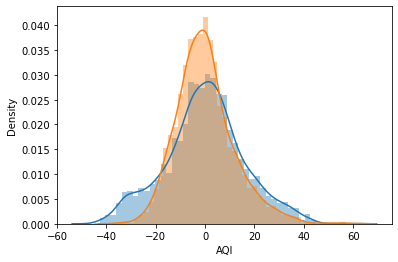

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(y_val-y_pred)
sns.distplot(y_val-y_pred_2)

Text(0.5, 1.0, 'Ridge Regression')

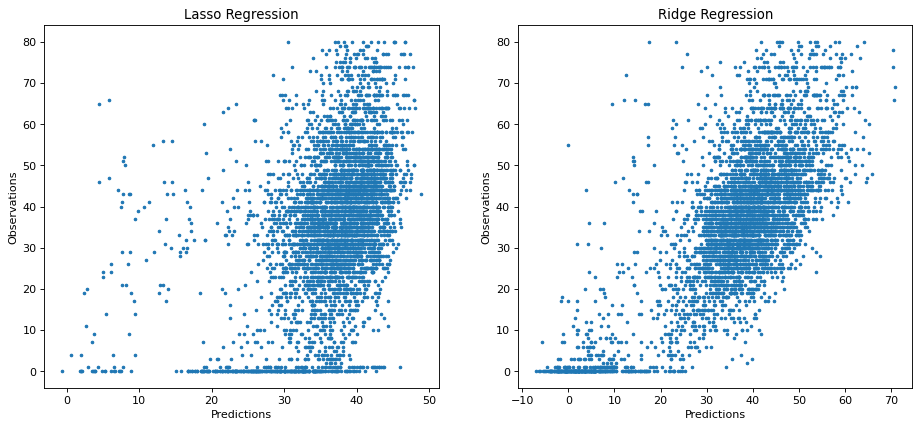

In [235]:
# Predictions vs Observations plots for validation
plt.figure(figsize=(14, 6), dpi=80)

plt.subplot(1, 2, 1)
plt.scatter(y_pred_val, y_val, s=5)
plt.xlabel("Predictions")
plt.ylabel("Observations")
plt.title("Lasso Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_pred_val_2, y_val, s=5)
plt.xlabel("Predictions")
plt.ylabel("Observations")
plt.title("Ridge Regression")


Text(0.5, 1.0, 'Ridge Regression')

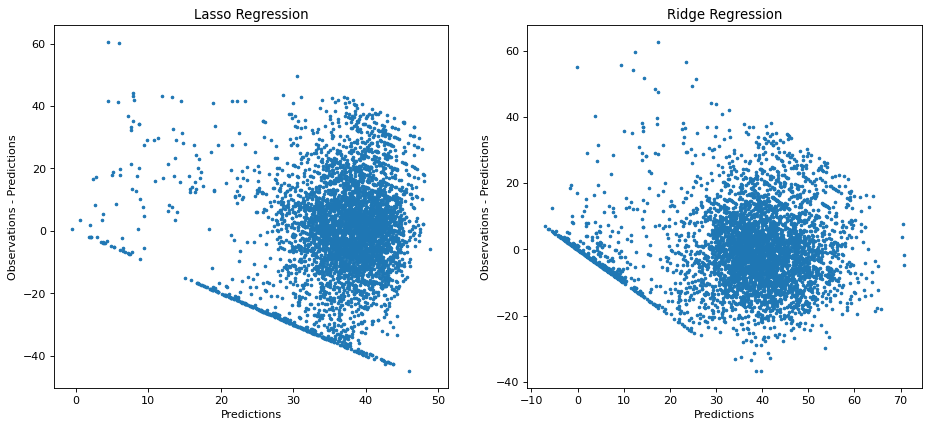

In [236]:
# Plot residuals for validation set

plt.figure(figsize=(14, 6), dpi=80)

plt.subplot(1, 2, 1)
plt.scatter(y_pred_val, y_val-y_pred_val, s=5)
plt.xlabel("Predictions")
plt.ylabel("Observations - Predictions")
plt.title("Lasso Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_pred_val_2, y_val-y_pred_val_2, s=5)
plt.xlabel("Predictions")
plt.ylabel("Observations - Predictions")
plt.title("Ridge Regression")

In [237]:
import sklearn

print(f'R^2 for LASSO on validation: {sklearn.metrics.r2_score(y_val, y_pred_val)}')
print(f'R^2 for Ridge on validation: {sklearn.metrics.r2_score(y_val, y_pred_val_2)}')

R^2 for LASSO on validation: 0.17806729894362994
R^2 for Ridge on validation: 0.5496053976550809


### Hyper parameter tuning to improve predictions

#### scale the data

In [157]:
X = process_data_fm(complete_data_set, is_test_set=True)
y = complete_data_set[["AQI"]]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### cross validation

In [ ]:
from sklearn.model_selection import KFold

def Kfold(k,Xs,ys,params_list,learning_rate=0.0001,draw_curve=True):
    # The total number of examples 
    total_num=len(Xs)
    
    # Built in K-fold function in Sci-Kit Learn
    kf=KFold(n_splits=k,shuffle=True)
    # record error for each model
    train_error_all=[]
    test_error_all=[]
    
    for train_selector,test_selector in kf.split(range(total_num)):
        ### Decide training examples and testing examples for this fold ###
        
        train_Xs=Xs[train_selector]
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]

        val_array=[]
        # Split training examples further into training and validation
        train_in,val_in,train_real,val_real=train_test_split(train_Xs,train_ys)
        
        
        
        
        # Save the lowest weights, so that we can recover the best model
        lowest_index = -1
        lowest_val_err = np.inf
        
        for i in range(len(params_list)):
            # Train model on different params  and test performance in the validation set
            
            params = params_list[i]

            model = Lasso(alpha=params["alpha"],fit_intercept=params["fit_intercept"],selection=params["selection"])

            model.fit(train_in,train_real)

            val_err = model.evaluate(val_in,val_real)
            val_array.append(val_err)
            if val_err < lowest_val_err:
                lowest_index = i
                lowest_val_err = val_err

        # get back the best model
        best_params = params_list[lowest_index]
        model = Lasso(alpha=best_params["alpha"],fit_intercept=best_params["fit_intercept"],selection=params["selection"])       

        # Report result for this fold
        train_error=model.evaluate(train_Xs, train_ys)
        train_error_all.append(train_error)
        test_error= model.evaluate(test_Xs,test_ys)
        test_error_all.append(test_error)
        print("Train error:",train_error)
        print("Test error:",test_error)
        
        if draw_curve:
            plt.figure()
            plt.plot(np.arange(len(val_array))+1,val_array,label='Validation loss')
            plt.xlabel('i')
            plt.ylabel('Loss')
            plt.legend()
            
    print("Final results:")
    print("Training error:%f+-%f"%(np.average(train_error_all),np.std(train_error_all)))
    print("Testing error:%f+-%f"%(np.average(test_error_all),np.std(test_error_all)))
    
    # return the last model
    return model

param_list = [
    {
        'alpha':.00001,
        'fit_intercept':True,
        'selection':'cyclic',
    },
    {
        'alpha':.0001,
        'fit_intercept':True,
        'selection':'cyclic',
    },
    {
        'alpha':.001,
        'fit_intercept':True,
        'selection':'cyclic',
    },
    {
        'alpha':.01,
        'fit_intercept':True,
        'selection':'cyclic',
    },
    {
        'alpha':.00001,
        'fit_intercept':False,
        'selection':'cyclic',
    },
    {
        'alpha':.0001,
        'fit_intercept':False,
        'selection':'cyclic',
    },
    {
        'alpha':.001,
        'fit_intercept':False,
        'selection':'cyclic',
    },
    {
        'alpha':.01,
        'fit_intercept':False,
        'selection':'cyclic',
    },
    {
        'alpha':.00001,
        'fit_intercept':True,
        'selection':'random',
    },
    {
        'alpha':.0001,
        'fit_intercept':True,
        'selection':'random',
    },
    {
        'alpha':.001,
        'fit_intercept':True,
        'selection':'random',
    },
    {
        'alpha':.01,
        'fit_intercept':True,
        'selection':'random',
    },
        {
        'alpha':.00001,
        'fit_intercept':False,
        'selection':'random',
    },
    {
        'alpha':.0001,
        'fit_intercept':False,
        'selection':'random',
    },
    {
        'alpha':.001,
        'fit_intercept':False,
        'selection':'random',
    },
    {
        'alpha':.01,
        'fit_intercept':False,
        'selection':'random',
    },
]


    

final_model = Kfold(5,X,y,param_list,learning_rate=0.0001)

